# Assignment 2 Brief 

## Deadline: Tuesday, December 3, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 6 to 9

## 1. Instructions
### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_2_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria 

* Being able to manipulate a dataset by generating sythetic data and extracting a particular subset. 

* Being able to build and train different machine learning models with tunable hyperparameters to optimise given evaluation metric.

* Being able to compare different machine learning models and explain interesting results observed. 

* Being able to follow examples in the lab and write code without the help of starter code.


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

# 2. Image classification and denoising

### The CIFAR-10 dataset
In this assignment, we will work on the [**CIFAR-10 dataset**](https://www.cs.toronto.edu/~kriz/cifar.html) collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto.  This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. Each image is a 3-channel colour images of 32x32 pixels in size. There are 50000 training images and 10000 test images. 

			
### Question 1: Data loading and manipulation (4 marks)

1a. **Download** both the training and test data of the CIFAR-10 dataset, e.g., by following the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). You can also download via other ways if you prefer.

1b. **Add random noise** to all training and test data to generate noisy dataset, e.g., by `torch.randn()`, with a scaling  factor `scale`, e.g., original image `+ scale * torch.randn()`, and **normalise/standardise** the pixel values to the **original range**, e.g.,  using `np.clip()`. You may choose any `scale` value between 0.2 and 0.5. 

**Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using `torch.manual_seed()`. This seed needs to be used for all remaining code if there is randomness, for reproducibility.**

1c. **Extract a subset** with only two classes: **Cat** and **Dog** and name it starting with **CatDog**.        

1d. Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.

In [1]:
TODO

NameError: name 'TODO' is not defined

In [ ]:
TODO:
    CHANGE 
    dataset[:500] 
    in logistic regression to 
    dataset
    
TODO:
    ANSWER WRITTEN QUESTIONS
    
TODO:
    DO QUESTION 1D PROPERLY

TODO:
    CHECK FOR OTHER TODO'S FURTHER ALONG

TODO:
    PLOT CONFUSION MATRICES
    
TODO:
    CHECK IF CORRECT DATASET HAS BEEN USED IN EACH QUESTION 
    
TODO:
    CHANGE 
    dataset[:500] 
    in AUTOENCODER to USE ALL VALUES

In [ ]:
TODO

#### Question 1 Answer

In [1]:
# Write the code for your answer here. You can use multiple cells to improve readability.
import torch
import torchvision
import torchvision.transforms as transforms
# import numpy as np

#A transformation to normalise the data to be between 0 and 1
transform = transforms.ToTensor()

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)

image_classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [2]:
"""
1b. Add random noise
1c. Extract a subset
"""

torch.manual_seed(1647052)
scale = 0.5
#image = image + (torch.rand(1)*scale)

"""
Images without noise 
"""
train_images = []
cat_images = []
dog_images = []

"""
Images with noise 
"""
train_images_noise = []
cat_images_noise = []
dog_images_noise = []

"""
Labels
"""
train_labels = []
cat_labels = []
dog_labels = []

for data in trainloader:
    image, label = data 
    train_images.append(image)
    train_images_noise.append((image + scale) *torch.rand(1))
    train_labels.append(label)
    if label == 3:
        cat_images.append(image)
        cat_images_noise.append((image + scale) *torch.rand(1))
        cat_labels.append(label)
    elif label == 5:
        dog_images.append(image)
        dog_images_noise.append((image + scale) *torch.rand(1))
        dog_labels.append(label)
        


In [3]:
"""
1d. Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs

TO-DO original AND noisy images
"""
import matplotlib.pyplot as plt
import numpy as np
CatDog = cat_images + dog_images
CatDog_noise = cat_images_noise + dog_images_noise
CatDogLabels = cat_labels + dog_labels

def imshow(img_noise, img_no_noise):
    img_no_noise = img_no_noise / 2 + 0.5     # unnormalize
    img_noise = img_noise / 2 + 0.5     # unnormalize
    
    npimg_no_noise = img_no_noise.numpy()
    npimg_noise = img_noise.numpy()    
    
    transform_npimg_no_noise = (np.transpose(npimg_no_noise, (1, 2, 0)))
    transform_npimg_noise = (np.transpose(npimg_noise, (1, 2, 0)))
    
    return transform_npimg_noise, transform_npimg_no_noise

for i in range(10):
    #Show 10 Cat pairs (noise and no noise)
    plt.figure(figsize = (30, 30))
    plt.subplot(4,15,i+1)
    
    img_no_noise = torchvision.utils.make_grid(CatDog[i])
    img_noise = torchvision.utils.make_grid(CatDog_noise[i])
    
    cat_noise, cat_no_noise = imshow(img_noise, img_no_noise)
    
    plt.title("Cat - Noise")
    plt.imshow(cat_noise)
    plt.subplot(4,15,i+2)
    plt.title("Cat - No noise")
    plt.imshow(cat_no_noise)
    
    #Show 10 Dog pairs (noise and no noise)
    dogs_no_noise = CatDog[-10:]
    dogs_noise = CatDog_noise[-10:]
    plt.subplot(4,15,i+3)

    img_no_noise = torchvision.utils.make_grid(dogs_no_noise[i])
    img_noise = torchvision.utils.make_grid(dogs_noise[i])
    
    dog_noise, dog_no_noise = imshow(img_noise, img_no_noise)

    plt.title("Dog - Noise")
    plt.imshow(dog_noise)
    plt.subplot(4,15,i+4)
    plt.title("Dog - No noise")
    plt.imshow(dog_no_noise)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


### Question 2: Dimensionality reduction, binary classification, and evaluation (6 marks)

This question uses the **CatDog** subset **with no noise added**.

#### Training

2a. Apply PCA on the training set to reduce the dimensionality. You need to study **at least seven** different values ($k_1, k_2, ..., k_7$) for the reduced dimensionality. **Explain** your choice.

2b. Train **eight** Naive Bayes Classifiers (NBC): one on the original features (raw pixels), and seven on PCA features with seven different dimensions in 2a, i.e., NBC on $k_1$ PCA features; NBC on $k_2$ PCA features; ..., NBC on $k_7$ PCA features. You will need to decide on what Naive Bayes classifier (Gaussian? Multinomial? etc.) to use and **explain** your choice.

#### Testing and evaluation
2c. Evalaute the eight Naive Bayes classifiers on the test set in terms of **classification accuracy** and **visualise** their performance using a bar graph.

2d. Plot the [ROC Curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) in true positive rates vs false positive rates for the eight Naive Bayes classifiers in **one figure** using eight different line/marker styles clearly labelled. 

2e. Compute the [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) values for the eight Naive Bayes classifiers and visualise using a bar graph.

2f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 


In [4]:
# Write the code for your answer here. You can use multiple cells to improve readability.
"""
2a. Apply PCA on the training set 
"""
import numpy as np
from sklearn.decomposition import PCA

def pca_CatDog(dataset):
    CatDog_stack = torch.stack(dataset)
    CatDog_stack = np.squeeze(CatDog_stack.numpy())
    CatDog_pca = CatDog_stack.reshape(CatDog_stack.shape[0],-1)

    pca = PCA(svd_solver='randomized',
              whiten=True).fit(CatDog_pca)
    return pca, CatDog_pca

pca, CatDog_pca = pca_CatDog(CatDog)

In [5]:
def values_of_k(percentage_variance, pca):
    eigenvectors_total_sum = sum(pca.explained_variance_)
    values_of_k = []
    for i in percentage_variance:
        k = 0
        current_eigenvectors_sum = 0
        while(current_eigenvectors_sum / eigenvectors_total_sum <= i):
            current_eigenvectors_sum += pca.explained_variance_[k]
            k += 1
        values_of_k.append(k)
        
    return values_of_k

percentage_variance = [0.99,0.89,0.79,0.69,0.59,0.49,0.39]
k_list = values_of_k(percentage_variance, pca)
print(k_list)

[561, 77, 29, 14, 8, 4, 3]


In [6]:
"""
2b. Train eight Naive Bayes Classifiers (NBC)
"""
import timeit
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_blobs

def multinomial_naive_bayes(dataset, k, labels, num_models):
    
    mnb = dict()
    times = []
    #initialise models
    for i in range(num_models):
        mnb[i] = MultinomialNB()

    model = dict()
    
    start = timeit.default_timer()
    #train model 0
    model[0] = mnb[0].fit(dataset, labels)
    stop = timeit.default_timer()
    #calculate length of time to train model 0
    times.append(stop-start)
    
    #train models using k1-k7
    #calculate the length of time taken to train each model 
    for i in range(num_models-1):
        start = timeit.default_timer()
        model[i+1] = mnb[i+1].fit(dataset[:,:k[i]], labels)
        stop = timeit.default_timer()
        times.append(stop-start)
    
    return model, times

CatDogLabels_nb = np.asarray(CatDogLabels)
model,_ = multinomial_naive_bayes(CatDog_pca, k_list,CatDogLabels, 8)


#### 2b.You will need to decide on what Naive Bayes classifier (Gaussian? Multinomial? etc.) to use and explain your choice.

Gaussian Naive Bayes is used for continuous data and Multinomial Naive Bayes is used for discrete data. The RGB values are discrete since there are upper and lower limits to each RGB value. Therefore Multinomial Naive Bayes has been used for this data.

In [7]:
"""
2c. Evalaute the eight Naive Bayes classifiers on the test set 
"""
test_images = []
test_labels = []
test_images_CatDog = []
test_labels_CatDog = []
for data in testloader:
    image, label = data
    test_images.append(image)
    test_labels.append(label)
    if label == 3 or label == 5:
        test_images_CatDog.append(image)
        test_labels_CatDog.append(label)

In [8]:
from sklearn.metrics import accuracy_score

def reshape(dataset):
    stack = torch.stack(dataset)
    stack = np.squeeze(stack.numpy())
    dataset_reshape = stack.reshape(stack.shape[0],-1)
    return dataset_reshape
    
    
def accuracy(test_dataset, test_labels, model, values_of_k):
#     test_images_stack = torch.stack(test_images)
#     test_images_stack = np.squeeze(test_images_stack.numpy())
    test_times = []
    test_images_pca = reshape(test_dataset)

    test_labels_nb = np.asarray(test_labels)

    print(test_images_pca.shape)

    model_labels = []
    
    start = timeit.default_timer()
    model_labels.append(model[0].predict(test_images_pca))
    #initial_model_labels = model_k0.predict(test_images_pca)
    initial_accuracy = accuracy_score(test_labels_nb, model_labels[0])
    stop = timeit.default_timer()
    #calculate length of time taken to test model 0
    test_times.append(stop-start)

    print(initial_accuracy)
    accuracy = []
    
    #calculate the accuracy for each model
    #calculate length of time taken to test each model
    for i in range(len(model)-1):
        start = timeit.default_timer()
        model_labels.append(model[i+1].predict(test_images_pca[:,:values_of_k[i]]))
        acc = accuracy_score(test_labels_nb, model_labels[i+1])
        stop = timeit.default_timer()
        test_times.append(stop-start)
        accuracy.append(acc)

    #insert the accuracy for model 0 into the accuracy list
    accuracy.insert(0,initial_accuracy)
    return accuracy, test_images_pca, test_labels_nb, model_labels, test_times

accuracy1, test_images_pca, test_labels_nb, model_labels,_ = accuracy(test_images_CatDog, test_labels_CatDog, model, k_list)



(2000, 3072)
0.567


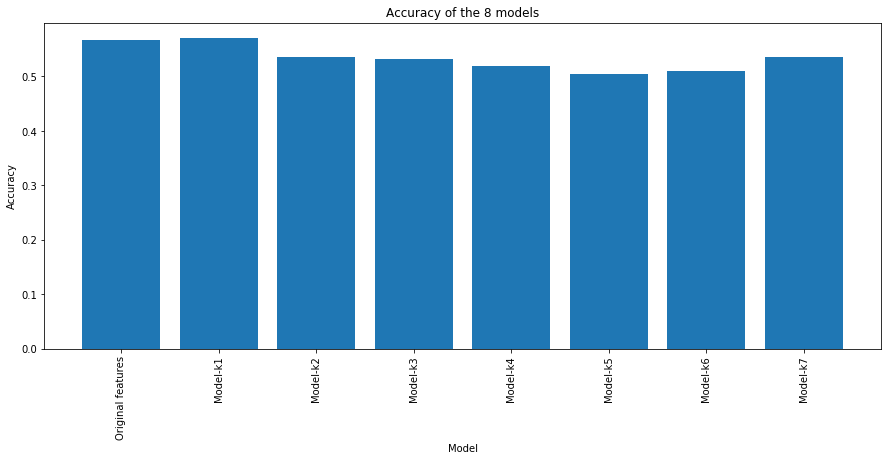

In [9]:
import matplotlib.pyplot as plt

def plot_graph(title, y_axis_label, data, x_names, x_label):      
    x_pos = np.arange(len(data))
    plt.figure(figsize=(15,6))
    plt.bar(x_pos, data)
    plt.xticks(x_pos, x_names, rotation='vertical')
    plt.xlabel(x_label)
    plt.ylabel(y_axis_label)
    plt.title(title)
    plt.show()

title = "Accuracy of the 8 models"
y_axis_label = "Accuracy"
x_names = ('Original features', 'Model-k1', 'Model-k2', 'Model-k3', 'Model-k4', 'Model-k5', 'Model-k6', 'Model-k7')
x_label = "Model"
plot_graph(title, y_axis_label, accuracy1, x_names, x_label)

In [10]:
"""
2d. Plot the ROC Curves
"""
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
lr_probs = model[0].predict_proba(test_images_pca)
print(lr_probs.shape)
lr_probs = lr_probs[:, 1]

#draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging)
classes = [3,5]
y_true = label_binarize(test_labels_nb, classes=classes)
y_pred = []
for i in range(len(model_labels)):
    y_pred.append(label_binarize(model_labels[i], classes=[3,5]))

fpr = dict()
tpr = dict()
roc_auc = []

for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_true.ravel(), y_pred[i].ravel())
    roc_auc.append(auc(fpr[i], tpr[i]))
    #lr_fpr, lr_tpr, _ = roc_curve(y_true.ravel(), y_pred.ravel())


(2000, 2)


The classifier with original features is model 0. Classifiers used for k1,...,k7 are models 1-7


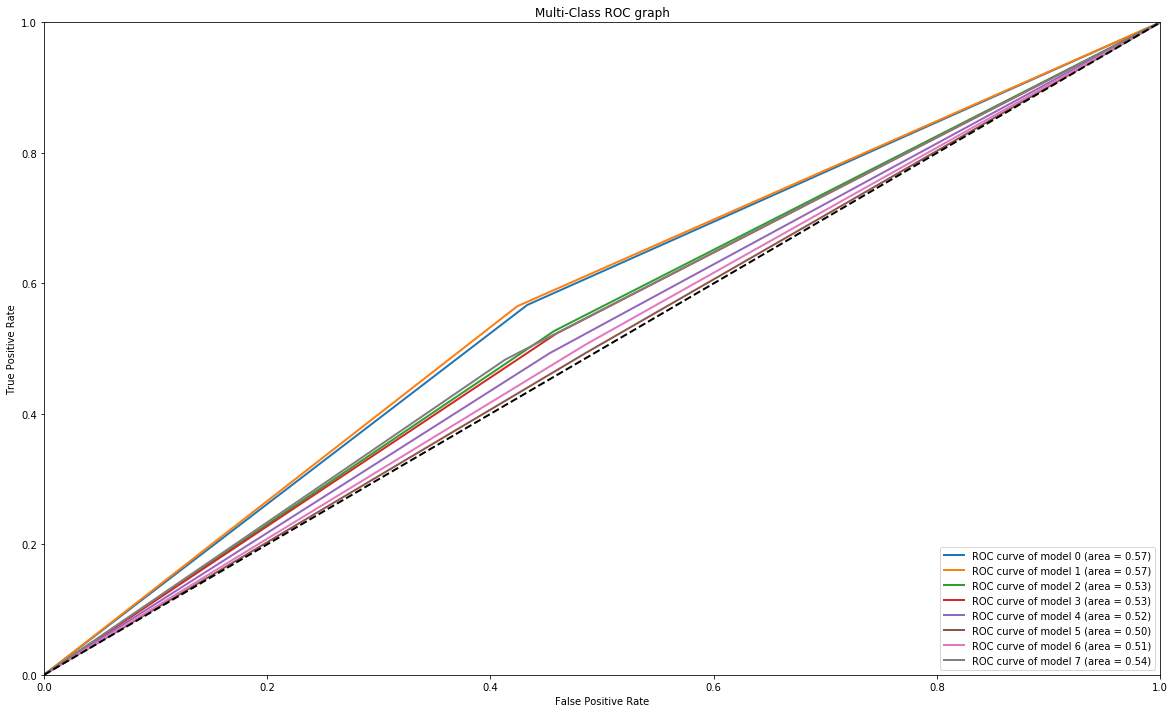

The classifier with original features is model 0. Classifiers used for k1,...,k7 are models 1-7


In [11]:
#use a random seed to set the colours for the lines in the graph
import random

random.seed(1647052)

plt.figure(figsize=(20,12))
lw = 2
colors = []
for i in range(len(model_labels)):
    colors.append('#%06X' % random.randint(0, 0xFFFFFF))
for i, color in zip(range(8), colors):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of model {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
print("The classifier with original features is model 0. Classifiers used for k1,...,k7 are models 1-7")
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC graph')
plt.legend(loc="lower right")
plt.show()

print("The classifier with original features is model 0. Classifiers used for k1,...,k7 are models 1-7")

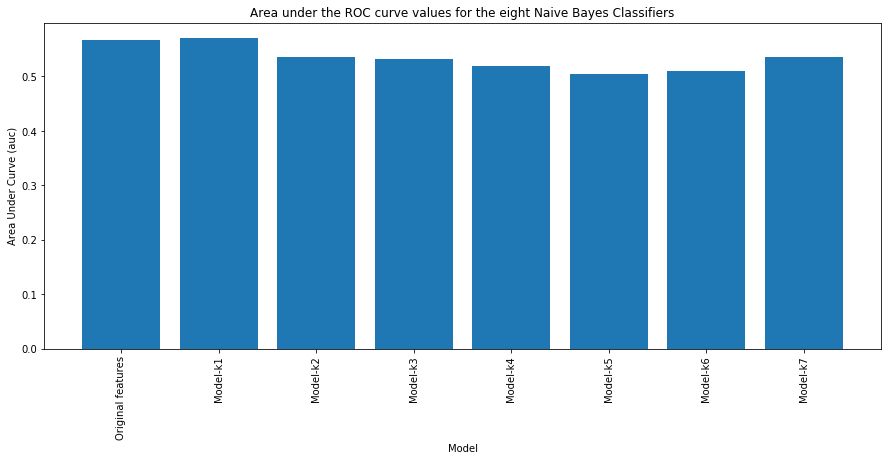

In [12]:
"""
2e. Compute the area under the ROC curve values for the eight Naive Bayes classifiers and visualise using a bar graph
"""
title = "Area under the ROC curve values for the eight Naive Bayes Classifiers"
y_axis_label = "Area Under Curve (auc)"
x_label = "Model"
plot_graph(title, y_axis_label, roc_auc, x_names, x_label)

#### 2f. Describe at least three interesting observations from the evaluation results above.

Area under curve (auc) is a performance measurement for classification. A higher auc value indicates that the model performs better at classification. The first interesting observation from the bar graph above is that the model that was trained using the original features (all the features) had the same auc as the model trained using k1 features. This can be explained because k1 features accounted for 99% variance (explained 99% of the data). 

The second interesting observation is that between Model-k1 (k1 features) and Model-k5 (k5 features) the auc decreased. This can be explained because the the value of k for each successive model accounted for a smaller percentage variance. k5 accounted for 59% variance.

The third interesting observation is that the auc for models after Model-k5 increased. Model-k6 used a k value that accounted for 49% variance and Model-k7 accounted for 39% variance. This means that using these k values was more efficient as it provided a higher accuracy with less computation than with the higher number of features used in the previous models.

### Question 3: Noisy data and multiclass classification (6 marks)

#### Noisy **CatDog** subset.

3a. Repeat 2a, 2b, and 2c on the noisy version of CatDog subset. Show the bar graph and compare it with that in 2c above. 

#### Multiclass classification using the original CIFAR-10 dataset (all 10 classes)

3b. Apply PCA on the training set to reduce the dimensionality. You need to study at least **three** different values for the reduced dimensionality. Explain your choice.

3c. Train nine classifers: **four Naive Bayes** classifiers(one on the original features, and three on PCA features with three different dimensions in 3b); **four Logistic Regression** classifiers (one on the original features, and three on PCA features with three different dimensions in 3b); and one **Convoluational Neural Network** as defined in the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

3d. Evalaute the nine classifiers on the test set. Summarise the **classification accuracy**, **total training time**, and **total test time** using three bar graphs.

3e. Show the confusion matrix for these nine classifiers (see Lab 8 - 1.4).

3f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [13]:
#import function to be used for timeing 
import timeit

In [14]:
# Write the code for your answer here. You can use multiple cells to improve readability.
"""
3a. Repeat 2a, 2b, and 2c on the noisy version of CatDog subset. Show the bar graph and compare it with that in 2c above. 
"""
pca, Cat_Dog_pca_noise = pca_CatDog(CatDog_noise)

In [15]:
percentage_variance = [0.99,0.89,0.79,0.69,0.59,0.49,0.39]
k_list2 = values_of_k(percentage_variance, pca)

In [16]:
CatDogLabels_nb = np.asarray(CatDogLabels)
model2,_ = multinomial_naive_bayes(Cat_Dog_pca_noise, k_list2,CatDogLabels,8)

In [17]:
accuracy2, test_images_pca, test_labels_nb, model_labels,_ = accuracy(test_images_CatDog, test_labels_CatDog, model2, k_list2)
print(accuracy1, accuracy2)

(2000, 3072)
0.5655
[0.567, 0.5705, 0.535, 0.532, 0.52, 0.504, 0.5105, 0.535] [0.5655, 0.5565, 0.5025, 0.5, 0.5, 0.5, 0.5, 0.5]


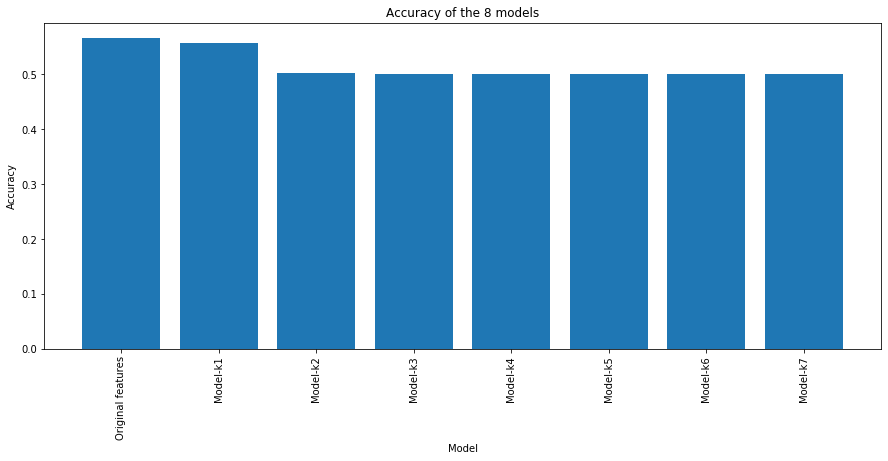

[0.567, 0.5705, 0.535, 0.532, 0.52, 0.504, 0.5105, 0.535] [0.5655, 0.5565, 0.5025, 0.5, 0.5, 0.5, 0.5, 0.5]


In [18]:
title = "Accuracy of the 8 models"
y_axis_label = "Accuracy"
x_label = "Model"
plot_graph(title, y_axis_label, accuracy2, x_names, x_label)
print(accuracy1, accuracy2)

TODO:
    
    
    COMPARE SCORES OF BOTH ACCURACY GRAPHS 

In [19]:
"""
3b. Apply PCA on the training set to reduce the dimensionality
"""

pca, train_images_pca = pca_CatDog(train_images)

In [20]:
percentage_variance = [0.99,0.79,0.59]
k_list3 = values_of_k(percentage_variance, pca)

I studied the three values 99%, 79% and 59% because there is a noticable gap between each value, therefore they will allow for comparison. 

In [21]:
"""
3c. Train nine classifers: four Naive Bayes classifiers
"""
from sklearn.linear_model import LogisticRegression
#Multinomial Naive Bayes
num_models = 4
model3, nb_times = multinomial_naive_bayes(train_images_pca, k_list3,train_labels, num_models)


In [22]:
"""
3c. four Logistic Regression classifiers 
"""

def Logistic_Regression(num_models, k, dataset, labels):
    lr = dict()
    lr_models = dict()
    times = []
    for i in range(num_models):
        lr[i] = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter=10000)  
    
    #Get length of time to train the first classifier 
    start = timeit.default_timer()
    lr_models[0] = lr[0].fit(dataset[:500], labels[:500])
    stop = timeit.default_timer()
    times.append(stop-start)
    
    for i in range(num_models-1):
        start = timeit.default_timer()
        lr_models[i+1] = lr[i+1].fit(dataset[:500,:k[i]], labels[:500])
        stop = timeit.default_timer()
        times.append(stop-start)    
                                     
    return lr_models, times

train_labels_lr = np.asarray(train_labels)
train_images_lr = reshape(train_images)

num_models = 4
lr_models, lr_times = Logistic_Regression(4, k_list3, train_images_lr, train_labels_lr)

In [23]:
"""
3c. one Convoluational Neural Network
"""
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [24]:
#define loss function and optimiser 

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [25]:
#Train the network

start = timeit.default_timer()
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
stop = timeit.default_timer()

cnn_time = stop-start
print('Finished Training')

[1,  2000] loss: 2.305
[1,  4000] loss: 2.270
[1,  6000] loss: 2.145
[1,  8000] loss: 2.040
[1, 10000] loss: 1.978
[1, 12000] loss: 1.891
[1, 14000] loss: 1.843
[1, 16000] loss: 1.828
[1, 18000] loss: 1.786
[1, 20000] loss: 1.762
[1, 22000] loss: 1.759
[1, 24000] loss: 1.711
[1, 26000] loss: 1.717
[1, 28000] loss: 1.674
[1, 30000] loss: 1.714
[1, 32000] loss: 1.692
[1, 34000] loss: 1.681
[1, 36000] loss: 1.689
[1, 38000] loss: 1.698
[1, 40000] loss: 1.622
[1, 42000] loss: 1.677
[1, 44000] loss: 1.636
[1, 46000] loss: 1.625
[1, 48000] loss: 1.652
[1, 50000] loss: 1.615
[2,  2000] loss: 1.580
[2,  4000] loss: 1.605
[2,  6000] loss: 1.620
[2,  8000] loss: 1.619
[2, 10000] loss: 1.598
[2, 12000] loss: 1.566
[2, 14000] loss: 1.600
[2, 16000] loss: 1.619
[2, 18000] loss: 1.582
[2, 20000] loss: 1.573
[2, 22000] loss: 1.589
[2, 24000] loss: 1.609
[2, 26000] loss: 1.590
[2, 28000] loss: 1.556
[2, 30000] loss: 1.615
[2, 32000] loss: 1.567
[2, 34000] loss: 1.566
[2, 36000] loss: 1.589
[2, 38000] 

In [43]:
#Accuracy for convolutional neural network

correct = 0
total = 0
start = timeit.default_timer()
cnn_model_labels = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        cnn_model_labels.append(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
stop = timeit.default_timer()

cnn_test_time = stop-start
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

accuracy_comparison = dict()
accuracy_comparison["CNN"] = correct/total

Accuracy of the network on the 10000 test images: 45 %


In [44]:
print(cnn_model_labels)

[tensor([3]), tensor([0]), tensor([8]), tensor([8]), tensor([6]), tensor([6]), tensor([2]), tensor([6]), tensor([3]), tensor([1]), tensor([8]), tensor([9]), tensor([5]), tensor([7]), tensor([1]), tensor([6]), tensor([5]), tensor([3]), tensor([8]), tensor([6]), tensor([7]), tensor([0]), tensor([8]), tensor([1]), tensor([2]), tensor([3]), tensor([4]), tensor([2]), tensor([1]), tensor([6]), tensor([5]), tensor([4]), tensor([4]), tensor([6]), tensor([9]), tensor([3]), tensor([5]), tensor([1]), tensor([1]), tensor([5]), tensor([1]), tensor([6]), tensor([5]), tensor([6]), tensor([8]), tensor([9]), tensor([5]), tensor([1]), tensor([4]), tensor([4]), tensor([9]), tensor([8]), tensor([6]), tensor([5]), tensor([8]), tensor([8]), tensor([5]), tensor([9]), tensor([6]), tensor([4]), tensor([5]), tensor([5]), tensor([5]), tensor([9]), tensor([5]), tensor([6]), tensor([1]), tensor([0]), tensor([5]), tensor([7]), tensor([6]), tensor([6]), tensor([0]), tensor([8]), tensor([9]), tensor([2]), tensor([9])

In [28]:
#Accuracy of Naive Bayes 

accuracy3, _, test_labels_nb3, model_labels_nb3, nb_test_times = accuracy(test_images, test_labels, model3, k_list3)

for i in range(len(accuracy3)):
    if i == 0:
        accuracy_comparison["Naive Bayes-all data)"] = accuracy3[0]
    else:
        accuracy_comparison[f"Naive Bayes-k{i}"] = accuracy3[i]

(10000, 3072)
0.2933


In [29]:
#Accuracy for Logistic Regression 

lr_accuracy, _, _, model_labels_lr, lr_test_times = accuracy(test_images, test_labels, lr_models, k_list3)
print(lr_accuracy)

for i in range(len(lr_accuracy)):
    if i == 0:
        accuracy_comparison["LR-all data)"] = lr_accuracy[0]
    else:
        accuracy_comparison[f"LR-k{i}"] = lr_accuracy[i]

(10000, 3072)
0.2581
[0.2581, 0.1557, 0.1279, 0.1284]


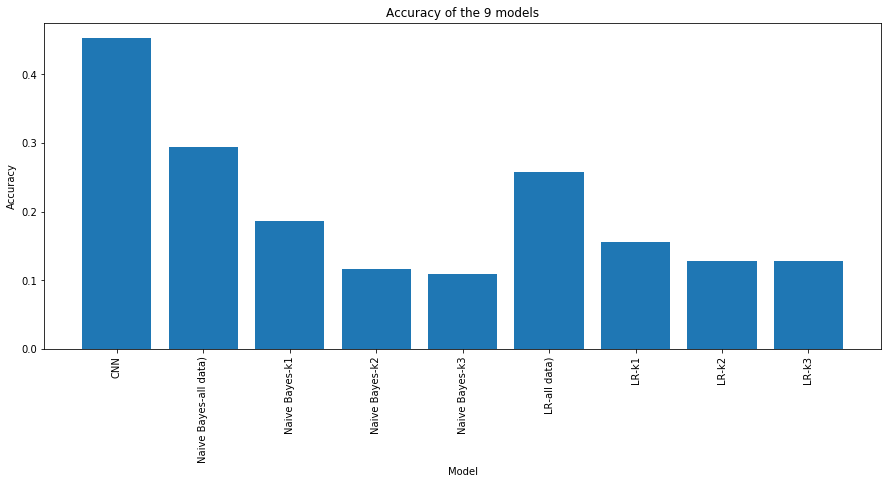

In [30]:
"""
3d. Evalaute the nine classifiers on the test set. 
Summarise the classification accuracy, total training time, and total test time using three bar graphs.
"""

#Plot accuracy 
title = "Accuracy of the 9 models"
y_axis_label = "Accuracy"
x_label = "Model"
plot_graph(title, y_axis_label, list(accuracy_comparison.values()), [*accuracy_comparison], x_label)

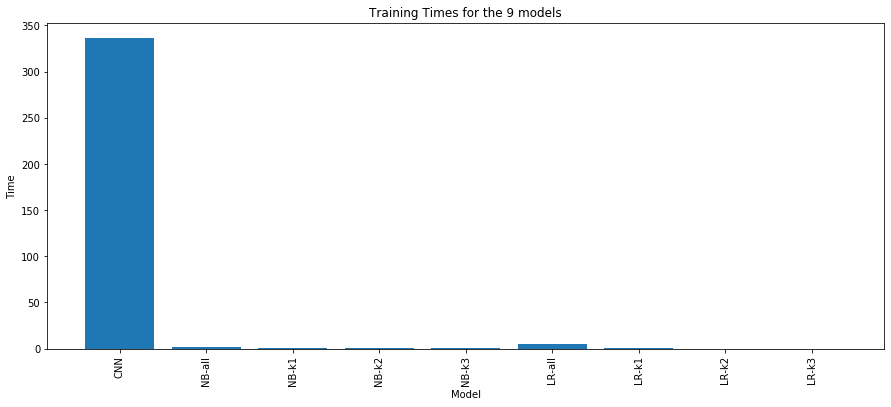

In [31]:
#Plot total training time 
import timeit

train_times = dict()

train_times["CNN"] = cnn_time

for i in range(len(nb_times)):
    if i == 0:
        train_times["NB-all"] = nb_times[i]
    else:
        train_times[f"NB-k{i}"] = nb_times[i]
    
for i in range(len(lr_times)):
    if i == 0:
        train_times["LR-all"] = lr_times[i]
    else:
        train_times[f"LR-k{i}"] = lr_times[i]
        
title = "Training Times for the 9 models"
y_axis_label = "Time"
x_label = "Model"
plot_graph(title, y_axis_label, list(train_times.values()), [*train_times], x_label)

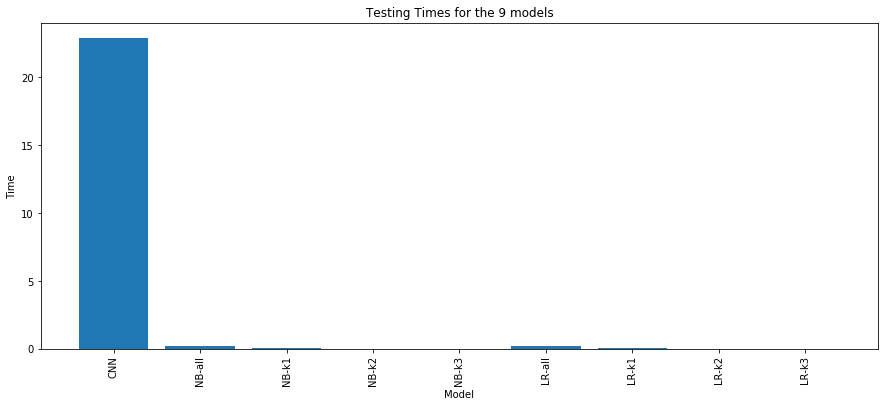

In [32]:
#Plot total run time 
test_times = dict()

test_times["CNN"] = cnn_test_time

for i in range(len(nb_test_times)):
    if i == 0:
        test_times["NB-all"] = nb_test_times[i]
    else:
        test_times[f"NB-k{i}"] = nb_test_times[i]
    
for i in range(len(lr_test_times)):
    if i == 0:
        test_times["LR-all"] = lr_test_times[i]
    else:
        test_times[f"LR-k{i}"] = lr_test_times[i]
        

title = "Testing Times for the 9 models"
y_axis_label = "Time"
x_label = "Model"
plot_graph(title, y_axis_label, list(test_times.values()), [*test_times], x_label)

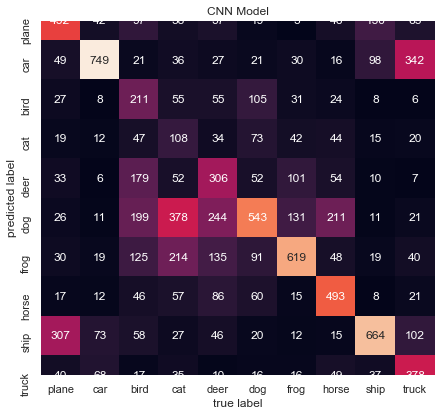

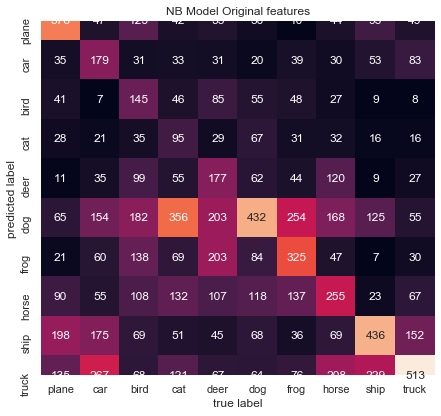

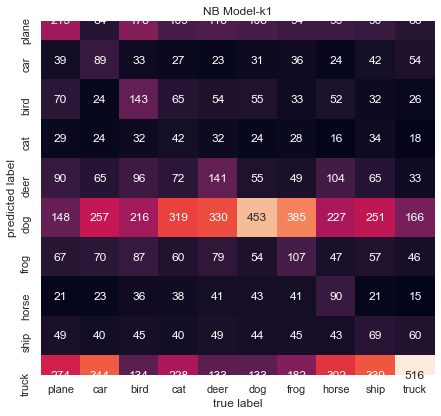

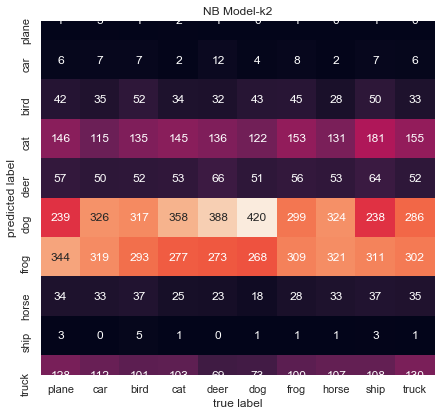

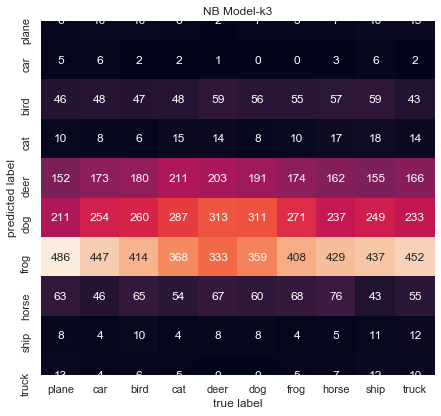

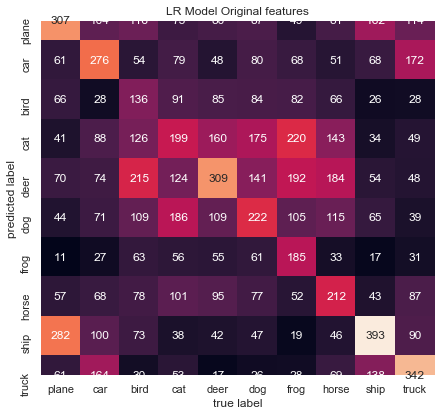

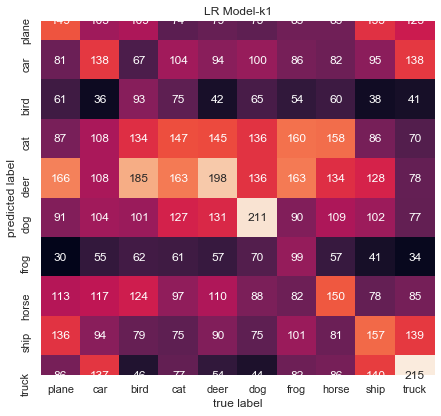

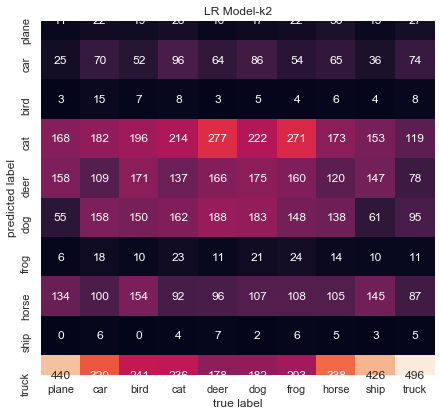

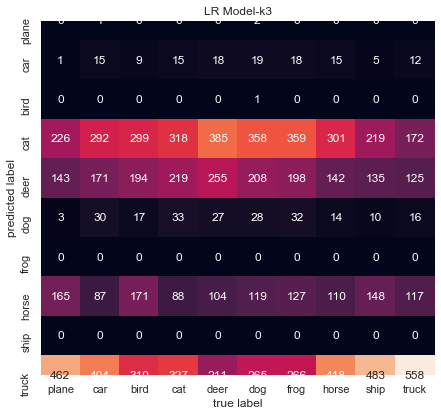

In [51]:
"""
3e. Show the confusion matrix for these nine classifiers
"""
import seaborn as sns; sns.set() # for statistical data visualization
#Consufion matrix - Naive Bayes Classifier with all features 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion(test_labels, model_labels, image_classes):
    mat = confusion_matrix(test_labels, np.asarray(model_labels))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=image_classes, yticklabels=image_classes)
    plt.xlabel('true label')
    plt.ylabel('predicted label');

plt.figure(figsize = (30, 30))
plt.subplot(4,2,1)
plt.title("CNN Model")
plot_confusion(test_labels, cnn_model_labels, image_classes)
    
for i in range(len(model_labels_nb3)):
    plt.figure(figsize = (30, 30))
    plt.subplot(4,2,i+1)
    if i == 0:
        plt.title("NB Model Original features")
    else:
        plt.title(f"NB Model-k{i}")
    plot_confusion(test_labels, model_labels_nb3[i], image_classes)

for i in range(len(model_labels_lr)):
    plt.figure(figsize = (30, 30))
    plt.subplot(4,2,i+1)
    if i == 0:
        plt.title("LR Model Original features")
    else:
        plt.title(f"LR Model-k{i}")
    plot_confusion(test_labels, model_labels_lr[i], image_classes)

### Question 4: Denoising Autoencoder (4 marks)

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).

Read about denoising autoencoder at [Wikepedia](https://en.wikipedia.org/wiki/Autoencoder#Denoising_autoencoder_(DAE)) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

4a. Modify the autoencoder architecture in Lab 7 so that it takes colour images as input (i.e., 3 input channels). 

4b. **Training**: feed the **noisy training images** as input to the autoencoder in 4a; use a loss function that computes the reconstruction error between the **output of the autoencoder** and the respective **original images**.

4c. **Testing**: evaluate the autoencoder trained in 4b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the **worstly denoised** 30 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (60 images to show in total).

4d. Choose at least two hyperparameters to vary. Study **at least three different choices** for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. Visualise the performance sensitivity with respect to these hyperparameters.

4e. Describe **at least two** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [35]:
# Write the code for your answer here. You can use multiple cells to improve readability.

"""
4a. Modify the autoencoder architecture in Lab 7 so that it takes colour images as input (i.e., 3 input channels). 
"""

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 3 input image channels (rgb), 16 output channel, 3x3 square convolution
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  #to range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [36]:
"""
4b. Training: feed the noisy training images as input to the autoencoder in 4a; use a loss function that 
computes the reconstruction error between the output of the autoencoder and the respective original images.

4c. Testing: evaluate the autoencoder trained in 4b on the test datasets
"""
#Hyperparameters for training
def train_and_evaluate(learning_rate, max_epochs, myAE):
    #Train
    
    #Set the random seed for reproducibility 
    torch.manual_seed(1647052) 
    #Choose mean square error loss
    criterion = nn.MSELoss() 
    #Choose the Adam optimiser
    optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
    #Storage
    outputs = []

    #Start training
    for epoch in range(max_epochs):
        for i in range(len(train_images_noise[:500])):
            img = train_images_noise[i]
            label = train_labels[i]
            optimizer.zero_grad()
            recon = myAE(img)
            loss = criterion(recon, img)
            loss.backward()
            optimizer.step()            
        if (epoch % 3) == 0:
            print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
        outputs.append((epoch, img, recon),)
    
    #Evaluate     
    recon_errors = dict()

    for epoch in range(max_epochs):
        for i in range(len(test_images[:500])):
            img = test_images[i]
            label = test_labels[i]
            optimizer.zero_grad()
            recon = myAE(img)
            loss = criterion(recon, img)
            recon_errors[i] = loss.detach()
            loss.backward()
            optimizer.step()
            outputs.append((epoch, img, recon),)    
    return recon_errors, outputs

learning_rate=1e-3
max_epochs = 1
myAE = Autoencoder()
recon_errors, outputs = train_and_evaluate(learning_rate, max_epochs, myAE)

Epoch:1, Loss:0.0082


In [37]:
#Find the worst denoised 30 images 
from operator import itemgetter 

num_items = 30
worst_denoised = dict(sorted(recon_errors.items(), key = itemgetter(1), reverse = True)[:num_items])
worst_denoised_keys = [*worst_denoised]

U:\envs\mlai19\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


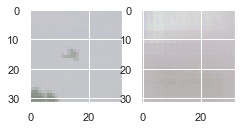

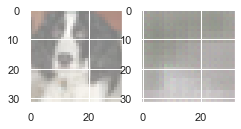

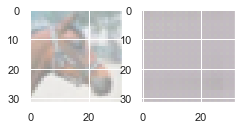

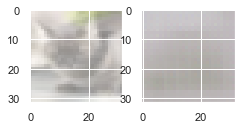

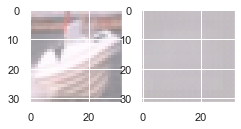

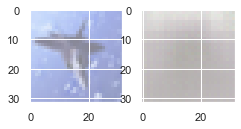

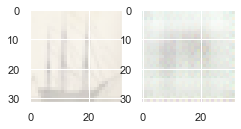

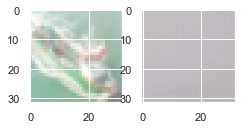

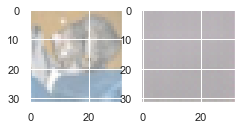

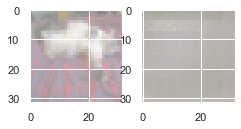

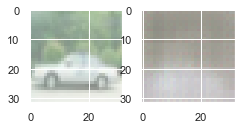

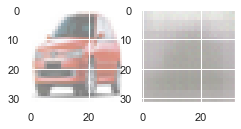

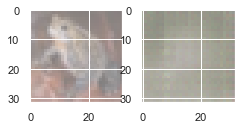

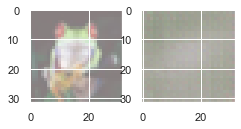

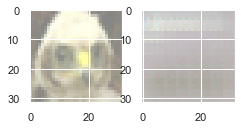

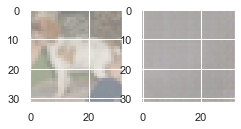

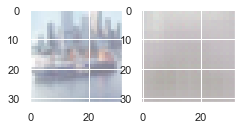

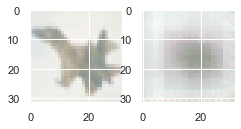

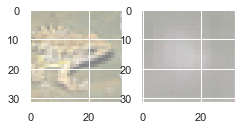

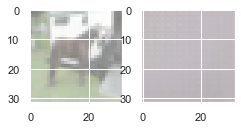

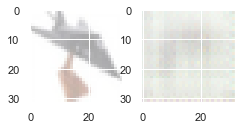

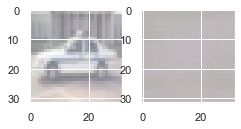

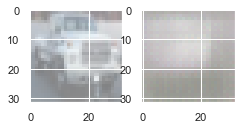

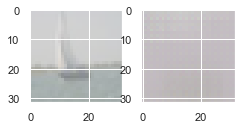

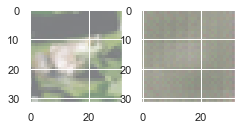

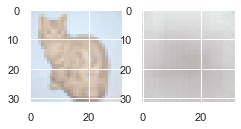

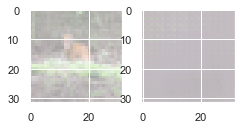

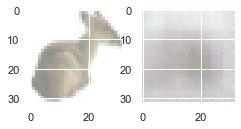

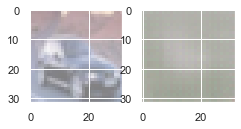

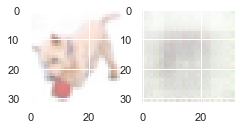

In [38]:
#Show the worst denoised images 
for i in worst_denoised_keys:
    plt.figure(figsize = (60, 60))
    img = torchvision.utils.make_grid(outputs[i][1])
    recon = torchvision.utils.make_grid(outputs[i][2]).detach()
    i, j = imshow(img, recon)
    plt.subplot(2,30,1)
    plt.imshow(i)
    plt.subplot(2,30,2)
    plt.imshow(j)

In [39]:
"""
4d. Choose at least two hyperparameters to vary
"""
from statistics import mean 

#Hyperparameters for training
learning_rate = [1e-3, 1e-4, 1e-5]
max_epochs = [1, 5, 10]

In [40]:
#Vary learning_rate 
#Keep max_epochs at 1
myAE1 = Autoencoder()
learning_rate_recon_errors = []
for i in range(len(learning_rate)):
    errors,_ = train_and_evaluate(learning_rate[i], max_epochs[0], myAE1)
    arr = []
    for i in range(len(errors)):
        value = errors[i].numpy()
        arr.append(value)
    learning_rate_recon_errors.append(arr)

Epoch:1, Loss:0.0090
Epoch:1, Loss:0.0021
Epoch:1, Loss:0.0021


In [41]:
#Vary max_epochs
#Keep learning rate at 1e-3
myAE2 = Autoencoder()
max_epochs_recon_errors = []
for i in range(len(max_epochs)):
    errors,_ = train_and_evaluate(learning_rate[0], max_epochs[i], myAE2)
    arr = []
    for i in range(len(errors)):
        value = errors[i].numpy()
        arr.append(value)
    max_epochs_recon_errors.append(arr)

Epoch:1, Loss:0.0090
Epoch:1, Loss:0.0028
Epoch:4, Loss:0.0021
Epoch:1, Loss:0.0021
Epoch:4, Loss:0.0012
Epoch:7, Loss:0.0023
Epoch:10, Loss:0.0015


In [42]:
def calculate_mean(values):
    mean_errors = []
    for array in values:
        sum_values = 0
        count = 0
        for i in range(len(array)):
            sum_values += array[i]
            count += 1
        mean_errors.append(sum_values/count)
    return mean_errors

In [43]:
mean_lr_errors = calculate_mean(learning_rate_recon_errors)
print(mean_lr_errors)

[0.03732523695752025, 0.028609054778702556, 0.027719528700225055]


In [44]:
mean_me_errors = calculate_mean(max_epochs_recon_errors)

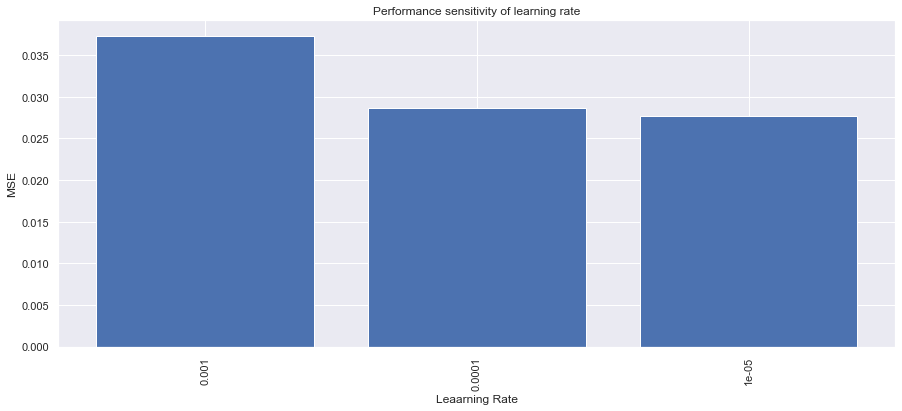

In [45]:
#Visualise MSE with learning rate variations 
title = "Performance sensitivity of learning rate"
y_axis_label = "MSE"
x_label = "Leaarning Rate"
plot_graph(title, y_axis_label, mean_lr_errors, learning_rate, x_label)

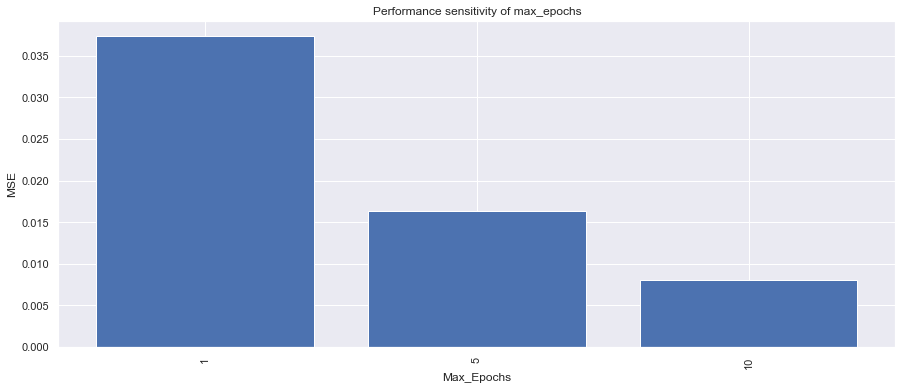

In [46]:
#Visualise performance of max_epochs 
title = "Performance sensitivity of max_epochs"
y_axis_label = "MSE"
x_label = "Max_Epochs"
plot_graph(title, y_axis_label ,mean_me_errors, max_epochs, x_label)

#### 4e. Describe at least two interesting observations from the evaluation results above. Each observation should have 3-5 sentences

One interesting observation is that the mse decreased as the learning rate decreased. This is because smaller corrections were being made, therefore the model was less likely to not overcorrect.

Another interesting observation is that as the max_epochs value increased the mse decreased. This is because more epochs means that the model performs the learning stage with more iterations. Therefore more epochs means the the model is better at reconstructing the image.